In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def func(x):
    return 1/(25*x**2 + 1)

def lk(x, nodes, n, k):
    """lagrange intercep. basis function l_k = \prod_{i=0,i\ne k}^n (x-x_i)/(x_k-x_i)"""
    nodes = [-1+2*j/n for j in range(n+1)]
    prod = np.prod([(x-nodes[i])/(nodes[k]-nodes[i]) for i in range(len(nodes)) if i != k])
    return prod

def Ln(n, x):
    """p_n(x) = \sum_{k=0}^n y_k l_k(x)"""
    nodes = [-1+2*j/n for j in range(n+1)]
    lk_basis = np.array([lk(x, nodes, n, k) for k in range(len(nodes))])
    yk_list = np.array([func(nodes[k]) for k in range(len(nodes))])
    p_n_x = lk_basis @ yk_list
    return p_n_x

def phik(x, nodes, n, k):
    """linear intercep. basis function phi_k"""
    if k == 0:
        if x > nodes[1]:
            return 0
        if x <= nodes[1]:
            return (x-nodes[1])/(nodes[0]-nodes[1])
    if k == len(nodes)-1:
        if x < nodes[-2]:
            return 0
        if x >= nodes[-2]:
            return (x-nodes[-2])/(nodes[-1]-nodes[-2])
    else:
        if (x <= nodes[k-1]) or (x >= nodes[k+1]):
            return 0;
        if (nodes[k-1] < x < nodes[k]):
            return (x-nodes[k-1])/(nodes[k]-nodes[k-1])
        if (nodes[k] <= x < nodes[k+1]):
            return (x-nodes[k+1])/(nodes[k]-nodes[k+1])

def In(n, x):
    """I_n(x) = \sum_{k=0}^n y_k \phi_k(x)"""
    nodes = [-1+2*j/n for j in range(n+1)]
    phik_basis = np.array([phik(x, nodes, n, k) for k in range(len(nodes))])
    yk_list = np.array([func(nodes[k]) for k in range(len(nodes))])
    I_n_x = phik_basis @ yk_list
    return I_n_x

def hermite_alpha(x, nodes, n, k):
    """hermite alpha basis function"""
    if k == 0:
        if x > nodes[1]:
            return 0
        if x <= nodes[1]:
            return (1+2*(x-nodes[0])/(nodes[1]-nodes[0]))*((x-nodes[1])/(nodes[0]-nodes[1]))**2
    if k == len(nodes)-1:
        if x < nodes[-2]:
            return 0
        if x >= nodes[-2]:
            return (1+2*(x-nodes[-1])/(nodes[-2]-nodes[-1]))*((x-nodes[-2])/(nodes[-1]-nodes[-2]))**2
    else:
        if (x <= nodes[k-1]) or (x >= nodes[k+1]):
            return 0;
        if (nodes[k-1] < x < nodes[k]):
            return (1+2*(x-nodes[k])/(nodes[k-1]-nodes[k]))*((x-nodes[k-1])/(nodes[k]-nodes[k-1]))**2
        if (nodes[k] <= x < nodes[k+1]):
            return (1+2*(x-nodes[k])/(nodes[k+1]-nodes[k]))*((x-nodes[k+1])/(nodes[k]-nodes[k+1]))**2
        
def hermite_beta(x, nodes, n, k):
    """hermite beta basis function"""
    if k == 0:
        if x > nodes[1]:
            return 0
        if x <= nodes[1]:
            return (x-nodes[0])*((x-nodes[1])/(nodes[0]-nodes[1]))**2
    if k == len(nodes)-1:
        if x < nodes[-2]:
            return 0
        if x >= nodes[-2]:
            return (x-nodes[-1])*((x-nodes[-2])/(nodes[-1]-nodes[-2]))**2
    else:
        if (x <= nodes[k-1]) or (x >= nodes[k+1]):
            return 0;
        if (nodes[k-1] < x < nodes[k]):
            return (x-nodes[k])*((x-nodes[k-1])/(nodes[k]-nodes[k-1]))**2
        if (nodes[k] <= x < nodes[k+1]):
            return (x-nodes[k])*((x-nodes[k+1])/(nodes[k]-nodes[k+1]))**2

def AngleEquation(nodes):
    """get the tridiagonal angle equation matrix and the gvector"""
    hlist = [nodes[i] - nodes[i-1] for i in range(1,len(nodes))]
    lambda_list = [hlist[i+1]/(hlist[i]+hlist[i+1]) for i in range(len(nodes)-2)]
    mu_list = [1-lambda_ for lambda_ in lambda_list]
    mat = np.zeros([len(nodes)-2, len(nodes)-2])
    mat += np.diag([2]*(len(nodes)-2))
    for i in range(len(nodes)-3):
        mat[i,i+1] = mu_list[i]
        mat[i+1,i] = lambda_list[i+1]
    gvector = [lambda_list[i]*(func(nodes[i+1])-func(nodes[i]))/(nodes[i+1]-nodes[i]) + \
               mu_list[i]*(func(nodes[i+2])-func(nodes[i+1]))/(nodes[i+2]-nodes[i+1]) for i in range(len(nodes)-2)]
    return mat, gvector

def spline_ms(nodes):
    """get the coefficgients of hermite beta functions"""
    mat, gvector = AngleEquation(nodes)
    ms = np.linalg.solve(mat, gvector)
    ms = np.insert(ms, 0, 0)
    ms = np.insert(ms, len(ms), 0)
    return ms

def Sn3(n, x):
    """S_n(x) = \sum_{k=0}^n y_k \alpha_k(x) + m_k \beta_k(x)"""
    nodes = [-1+2*j/n for j in range(n+1)]
    alphak_basis = np.array([hermite_alpha(x, nodes, n, k) for k in range(len(nodes))])
    betak_basis = np.array([hermite_beta(x, nodes, n, k) for k in range(len(nodes))])
    yk_list = np.array([func(nodes[k]) for k in range(len(nodes))])
    mk_list = spline_ms(nodes)
    S_n_3_x = alphak_basis @ yk_list + betak_basis @ mk_list
    return S_n_3_x

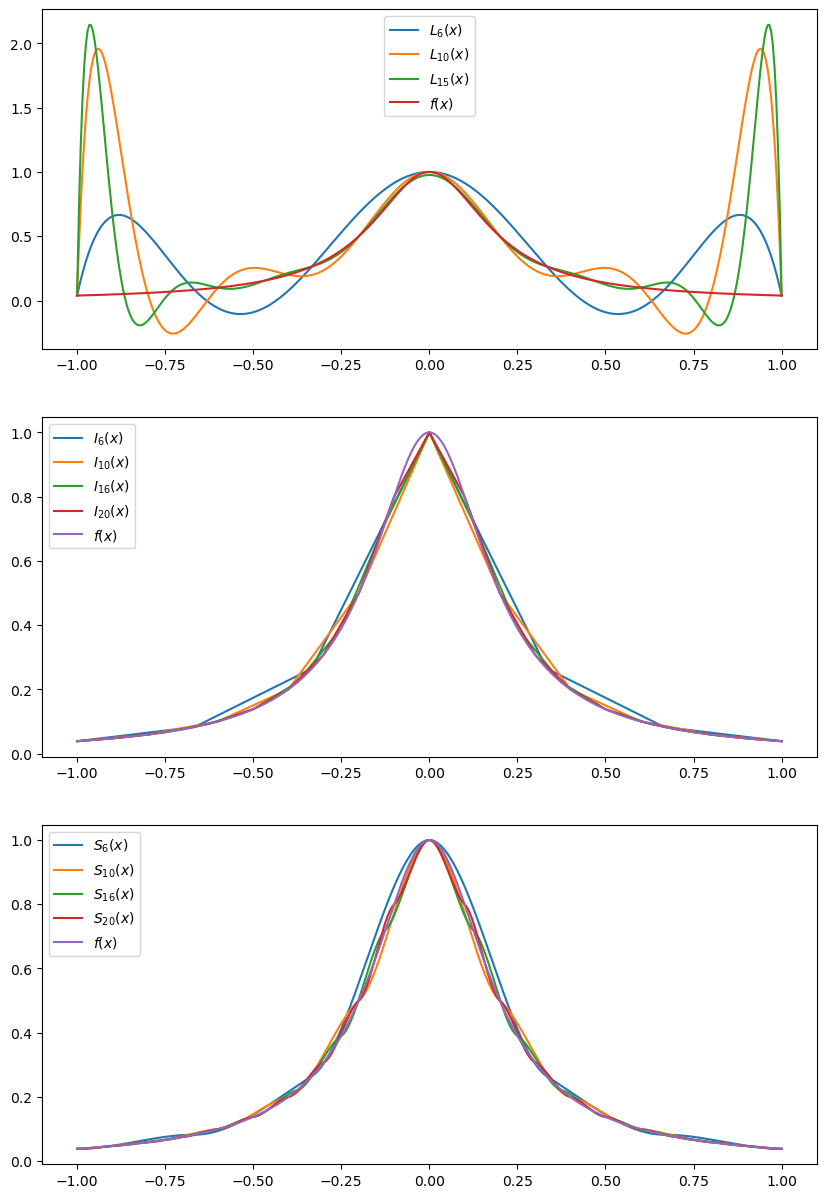

In [4]:
fig = plt.figure(figsize=(10, 15)) 
x = np.arange(-1,1+0.005,0.005)
yl1 = np.array([Ln(10, xi) for xi in x])
yl2 = np.array([Ln(6, xi) for xi in x])
yl3 = np.array([Ln(15, xi) for xi in x])
yi1  = np.array([In(10, xi) for xi in x])
yi2  = np.array([In(6, xi) for xi in x])
yi3  = np.array([In(16, xi) for xi in x])
yi4  = np.array([In(20, xi) for xi in x])
yh1  = np.array([Sn3(10, xi) for xi in x])
yh2  = np.array([Sn3(6, xi) for xi in x])
yh3  = np.array([Sn3(16, xi) for xi in x])
yh4  = np.array([Sn3(20, xi) for xi in x])
yf = np.array([func(xi) for xi in x])
plt.subplot(311)
plt.plot(x,yl2,label = "$L_{6}(x)$")
plt.plot(x,yl1,label = "$L_{10}(x)$")
plt.plot(x,yl3,label = "$L_{15}(x)$")
plt.plot(x,yf,label = "$f(x)$")
plt.legend(loc = "upper center")
plt.subplot(312)
plt.plot(x,yi2,label = "$I_{6}(x)$")
plt.plot(x,yi1,label = "$I_{10}(x)$")
plt.plot(x,yi3,label = "$I_{16}(x)$")
plt.plot(x,yi4,label = "$I_{20}(x)$")
plt.plot(x,yf,label = "$f(x)$")
plt.legend(loc = "upper left")
plt.subplot(313)
plt.plot(x,yh2,label = "$S_{6}(x)$")
plt.plot(x,yh1,label = "$S_{10}(x)$")
plt.plot(x,yh3,label = "$S_{16}(x)$")
plt.plot(x,yh4,label = "$S_{20}(x)$")
plt.plot(x,yf,label = "$f(x)$")
plt.legend(loc = "upper left")
plt.show()

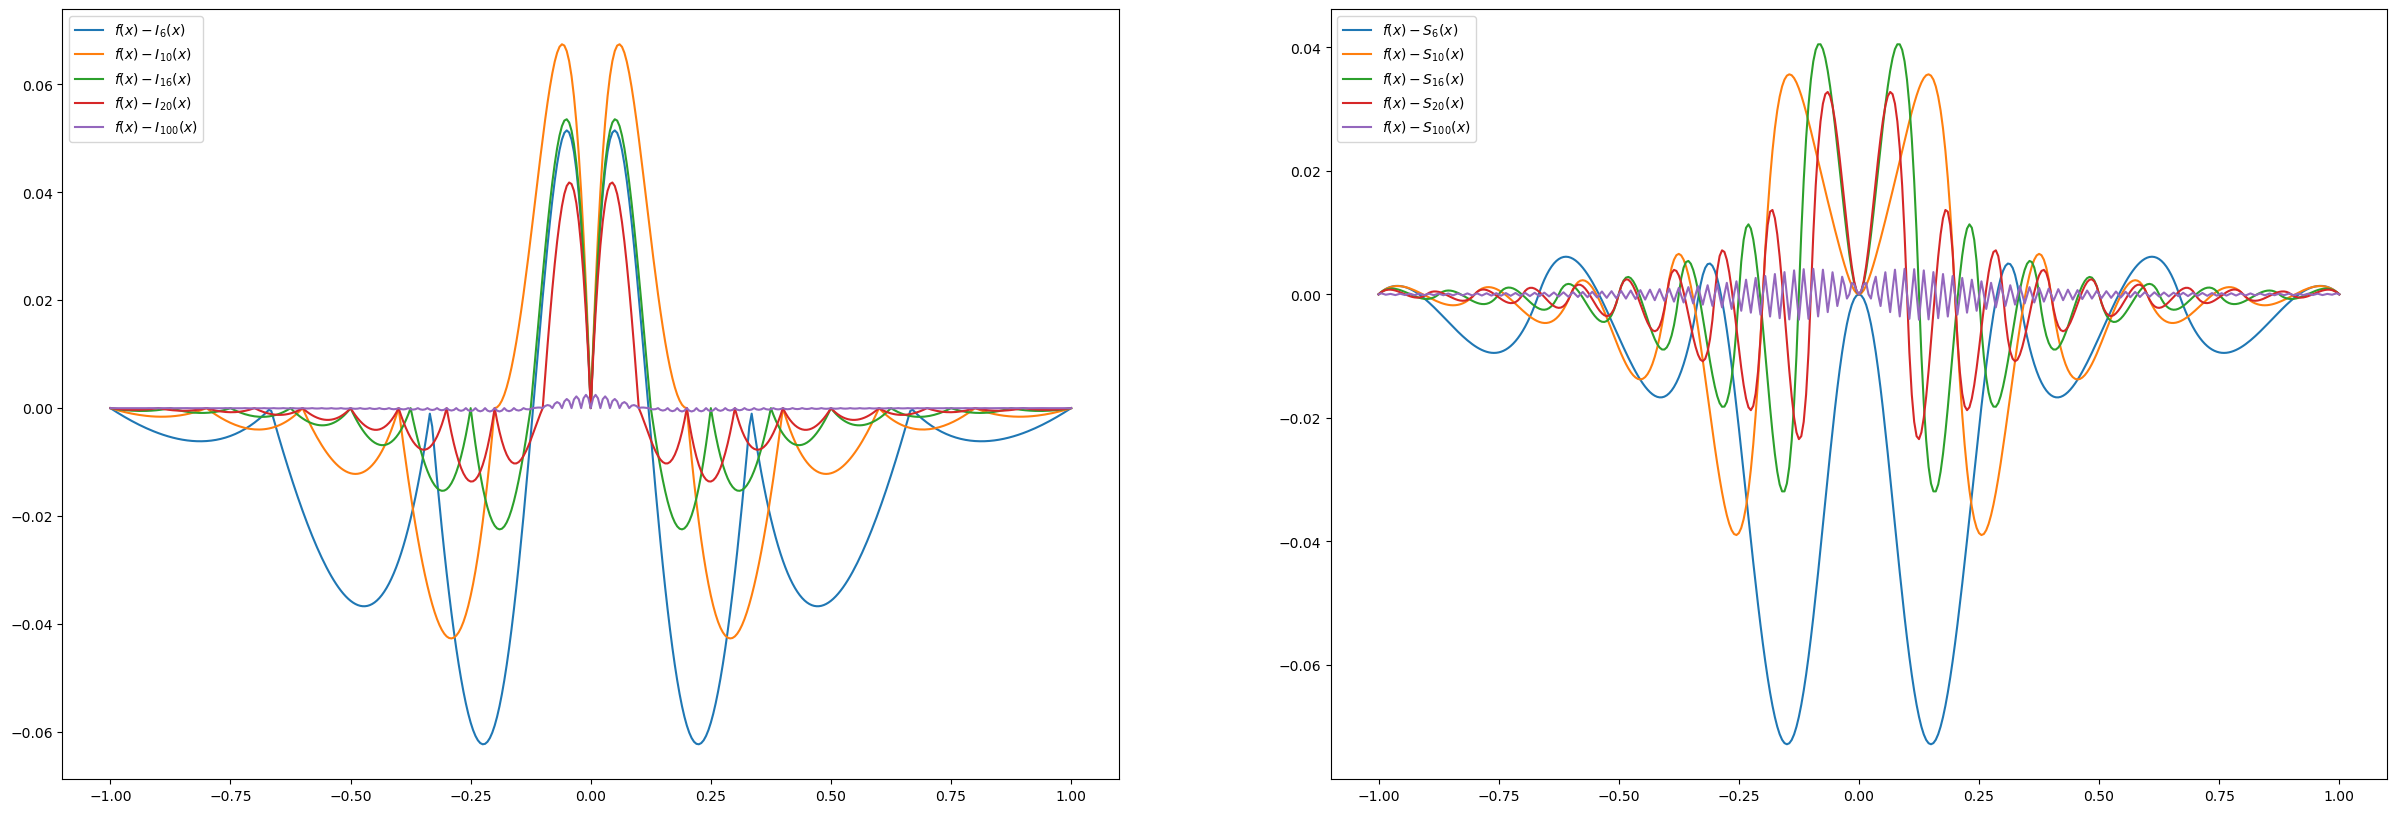

In [13]:
# plot the error function
fig = plt.figure(figsize=(30, 10)) 
er_yi1  = np.array([func(xi)-In(10, xi) for xi in x])
er_yi2  = np.array([func(xi)-In(6, xi) for xi in x])
er_yi3  = np.array([func(xi)-In(16, xi) for xi in x])
er_yi4  = np.array([func(xi)-In(20, xi) for xi in x])
er_yi5  = np.array([func(xi)-In(100, xi) for xi in x])
er_yh1  = np.array([func(xi)-Sn3(10, xi) for xi in x])
er_yh2  = np.array([func(xi)-Sn3(6, xi) for xi in x])
er_yh3  = np.array([func(xi)-Sn3(16, xi) for xi in x])
er_yh4  = np.array([func(xi)-Sn3(20, xi) for xi in x])
er_yh5  = np.array([func(xi)-Sn3(100, xi) for xi in x])
plt.subplot(121)
plt.plot(x,er_yi2,label = "$f(x)-I_{6}(x)$")
plt.plot(x,er_yi1,label = "$f(x)-I_{10}(x)$")
plt.plot(x,er_yi3,label = "$f(x)-I_{16}(x)$")
plt.plot(x,er_yi4,label = "$f(x)-I_{20}(x)$")
plt.plot(x,er_yi5,label = "$f(x)-I_{100}(x)$")
plt.legend(loc = "upper left")
plt.subplot(122)
plt.plot(x,er_yh2,label = "$f(x)-S_{6}(x)$")
plt.plot(x,er_yh1,label = "$f(x)-S_{10}(x)$")
plt.plot(x,er_yh3,label = "$f(x)-S_{16}(x)$")
plt.plot(x,er_yh4,label = "$f(x)-S_{20}(x)$")
plt.plot(x,er_yh5,label = "$f(x)-S_{100}(x)$")
plt.legend(loc = "upper left")
plt.show()